<a href="https://colab.research.google.com/github/yrodriguezmd/Fastai_Deep_Learning/blob/main/Miniproj_dataset_creation_LOTR_blog_2021Jul31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
#!pip install fastai -U
import fastai
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 4.9 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 10.2 MB/s 
     |████████████████████████████████| 188 kB 23.1 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 51 kB 311 kB/s 
Mounted at /content/gdrive


In [ ]:
!pip install jmd_imagescraper
from jmd_imagescraper.core import *
from pathlib import Path

In [ ]:
# learnings from previous attempts
#   good to start with a small pilot set, 
#      but too small set will not enable to move forward
#   don't be too detailed on cleaning
#   make sure you have time and mechanism to save the work, otherwise it gets lost
#   in saving, setting the right path is tricky
#   iterating on the search if placed on the same path will add the 
#     new search to the previous one-- recheck
#   default layout of square lets in a lot of product images

In [ ]:
## iterations done previously
root = Path().cwd()/'LOTR_characters_250'

search = duckduckgo_search

search(root, 'Frodo','frodo lord of the rings ', max_results = 250, img_layout=ImgLayout.All)
search(root, 'Aragorn','aragorn strider lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Gandalf','gandalf lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Sam','sam lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Merry','merry meriadoc lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Pippin','pippin peregrin lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Legolas','legolas lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Boromir','boromir lord of the rings ', max_results = 250,img_layout=ImgLayout.All)
search(root, 'Gimli','gimli lord of the rings ', max_results = 250,img_layout=ImgLayout.All)

Duckduckgo search: frodo lord of the rings 


Duckduckgo search: aragorn strider lord of the rings 


Duckduckgo search: gandalf lord of the rings 


Duckduckgo search: sam lord of the rings 


Duckduckgo search: merry meriadoc lord of the rings 


Duckduckgo search: pippin peregrin lord of the rings 


Exception occured while retrieving https://tse2.mm.bing.net/th?id=OIP.7Y2-P6PyctFRmOgLjRo3QwHaFj&pid=Api
Duckduckgo search: legolas lord of the rings 


Duckduckgo search: boromir lord of the rings 


Duckduckgo search: gimli lord of the rings 


[Path('/content/LOTR_characters_250/Gimli/001_d2859387.jpg'),
 Path('/content/LOTR_characters_250/Gimli/002_ae8a55c2.jpg'),
 Path('/content/LOTR_characters_250/Gimli/003_f4084779.jpg'),
 Path('/content/LOTR_characters_250/Gimli/004_43664aec.jpg'),
 Path('/content/LOTR_characters_250/Gimli/005_8523fd69.jpg'),
 Path('/content/LOTR_characters_250/Gimli/006_6e6a71f7.jpg'),
 Path('/content/LOTR_characters_250/Gimli/007_1acde2b3.jpg'),
 Path('/content/LOTR_characters_250/Gimli/008_d4e1261f.jpg'),
 Path('/content/LOTR_characters_250/Gimli/009_2555b62b.jpg'),
 Path('/content/LOTR_characters_250/Gimli/010_a859ce7d.jpg'),
 Path('/content/LOTR_characters_250/Gimli/011_e1c57e0f.jpg'),
 Path('/content/LOTR_characters_250/Gimli/012_24d782bf.jpg'),
 Path('/content/LOTR_characters_250/Gimli/013_a2a06fb4.jpg'),
 Path('/content/LOTR_characters_250/Gimli/014_195bec9c.jpg'),
 Path('/content/LOTR_characters_250/Gimli/015_e91e8b4a.jpg'),
 Path('/content/LOTR_characters_250/Gimli/016_d557d8b4.jpg'),
 Path('/

In [ ]:
# tempting to clean
# in attempt to be able to generalize, included all images that could be associated 
#    with the character, including accessories
# removed if with multiple major characters, obvious duplicates
# for boromir, let some faramir shots in, removed obvious aragorns
# for frodo, let some bilbo, other non-fellow chars
# for gandalf, let some saruman
# for legolas, let some elves
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
# pattern to root name
zip_name = 'LOTR_characters_250.zip'

!rm -f {zip_name}
!zip -q -r {zip_name} {root}
# zip contains cleaned set

from google.colab import files
files.download(zip_name) 

from google.colab import drive
import shutil

destination_folder = 'LOTR_characters_250' ## new name

drive.mount('/content/drive/')
folder = Path('/content/drive/My Drive')/destination_folder
folder.mkdir(parents=True, exist_ok = True)

shutil.copyfile(zip_name, str(folder/zip_name))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/LOTR_characters_250/LOTR_characters_250.zip'

In [ ]:
path = Path('drive/My Drive/LOTR_characters_250')

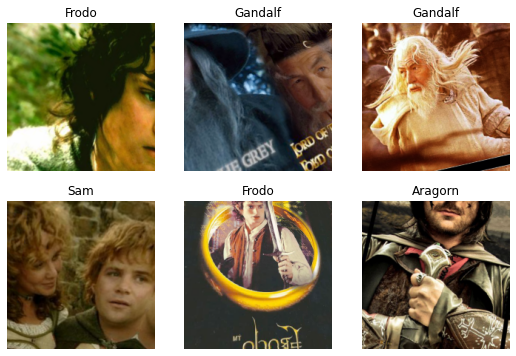

In [ ]:
## worked by placing more direct path
# automatic labelling based on folder location

chars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed =42),
    get_y = parent_label,
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size = 200, max_rotate = 30,
                                max_zoom = 1.2)
)

dls = chars.dataloaders(path/'/content/LOTR_characters_250/')

dls.show_batch(nrows = 2, ncols = 3)

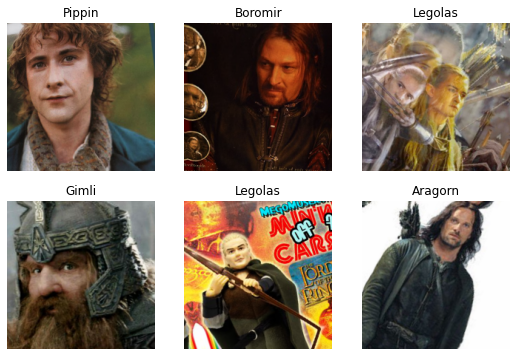

In [ ]:
dls.show_batch(nrows = 2, ncols = 3)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics = error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.269267,1.093298,0.326633,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.158376,0.776857,0.228643,00:13
1,0.910158,0.648809,0.193467,00:13
2,0.750169,0.553262,0.168342,00:13
3,0.594984,0.477713,0.148241,00:13
4,0.475652,0.447307,0.133166,00:13
5,0.353034,0.403328,0.118090,00:13
6,0.276277,0.397608,0.110553,00:13
7,0.237832,0.390823,0.110553,00:13


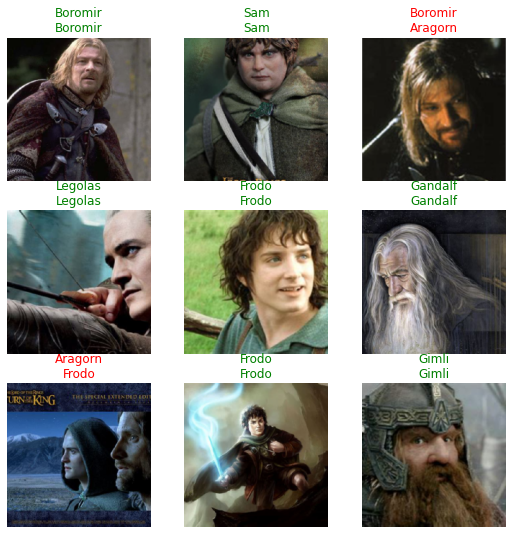

In [ ]:
learn.show_results(shuffle=False)

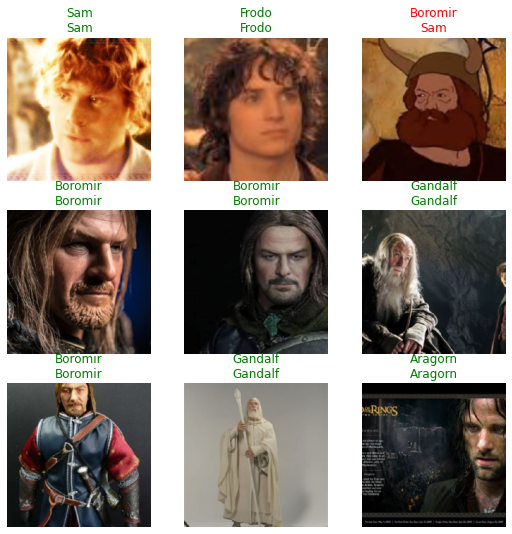

In [ ]:
learn.show_results(shuffle=True)


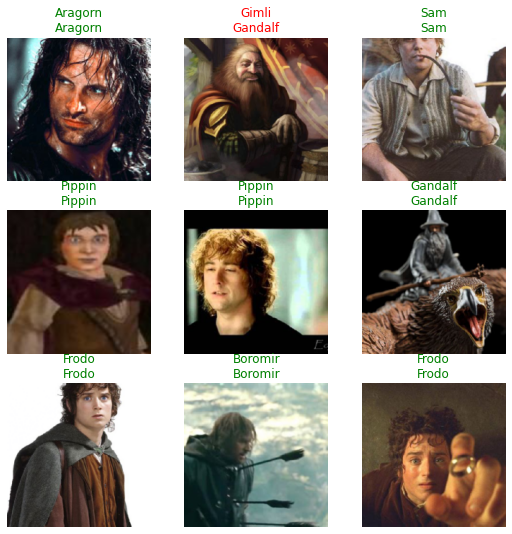

In [ ]:
learn.show_results(shuffle=True)

In [ ]:
print(learn.get_preds()[1][:9])
print(learn.dls.vocab)

TensorCategory([1, 8, 1, 5, 2, 3, 0, 2, 4])
['Aragorn', 'Boromir', 'Frodo', 'Gandalf', 'Gimli', 'Legolas', 'Merry', 'Pippin', 'Sam']


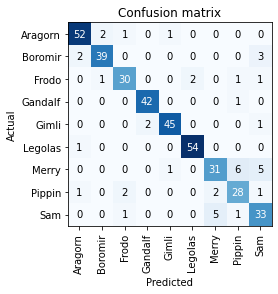

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

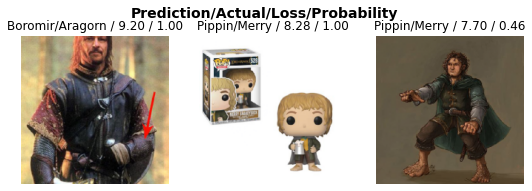

In [ ]:
interp.plot_top_losses(3)

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select your LOTR Fellowship character!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
# play with a non-LOTR fellowship image
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(100))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(100))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select your LOTR Fellowship character!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
learn.export()

path = Path()
path.ls(file_exts = '.pkl')

#to load: learn_inf = load_learner(path/'export.pkl)

(#1) [Path('export.pkl')]